In [1]:
pip install tensorflow keras sklearn matplotlib pandas pillow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,ZeroPadding2D

data = []
labels = []
classes = 81
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
data = np.array(data)
labels = np.array(labels)


In [3]:
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=80)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
y_train = to_categorical(y_train, 81)
y_test = to_categorical(y_test, 81)

(52798, 30, 30, 3) (52798,)
(42238, 30, 30, 3) (10560, 30, 30, 3) (42238,) (10560,)


In [4]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(1, 1)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(81, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 28, 28, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [5]:
epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("filename.model")

Epoch 1/30
1320/1320 [==============================] - 33s 25ms/step - loss: 1.3095 - accuracy: 0.6483 - val_loss: 0.1095 - val_accuracy: 0.9636
Epoch 2/30
1320/1320 [==============================] - 32s 25ms/step - loss: 0.2638 - accuracy: 0.9181 - val_loss: 0.0659 - val_accuracy: 0.9774
Epoch 3/30
1320/1320 [==============================] - 32s 24ms/step - loss: 0.1852 - accuracy: 0.9458 - val_loss: 0.1109 - val_accuracy: 0.9684
Epoch 4/30
1320/1320 [==============================] - 38s 29ms/step - loss: 0.1793 - accuracy: 0.9503 - val_loss: 0.0509 - val_accuracy: 0.9828
Epoch 5/30
1320/1320 [==============================] - 41s 31ms/step - loss: 0.1571 - accuracy: 0.9582 - val_loss: 0.0905 - val_accuracy: 0.9709
Epoch 6/30
1320/1320 [==============================] - 38s 29ms/step - loss: 0.1224 - accuracy: 0.9664 - val_loss: 0.0499 - val_accuracy: 0.9830
Epoch 7/30
1320/1320 [==============================] - 38s 29ms/step - loss: 0.1336 - accuracy: 0.9645 - val_loss: 0.0403 -

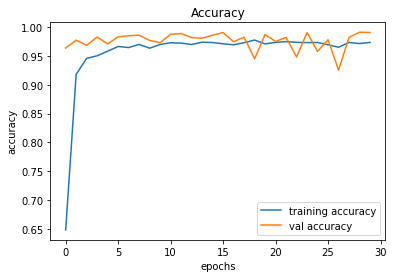

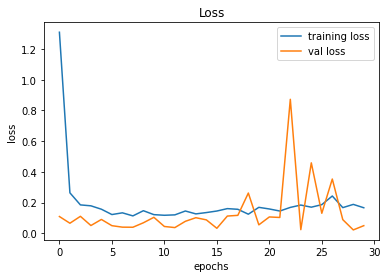

In [6]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
results = model.evaluate(X_test, y_test, batch_size=32)
print("test_loss,  test_accuracy : ",results)

330/330 [==============================] - 2s 6ms/step - loss: 0.0500 - accuracy: 0.9906
test_loss,  test_accuracy :  [0.04998750984668732, 0.9906250238418579]
